In [1]:
%reload_ext autoreload
%autoreload 2

import navsim_envs
import gym
import matplotlib.pyplot as plt
import numpy as np
from ezai_util.env import env_info
import cv2

navsim_envs: using cv2 as image library
navsim_envs: Adding arora-v0 to Gym registry


In [2]:
env_config = navsim_envs.arora.default_env_config.copy()
env_config["env_path"]="/data/work/unity-envs/Build2.10.8-ft/Berlin_Walk_V2"

In [ ]:
# look at all 3 observation modes

for i in [0,1,2]:
    env_config["obs_mode"]=i
    env = gym.make("arora-v0", env_config=env_config) # navsim_envs.env.AroraGymEnv(env_config)
    env_info(env)
    env.close()
    del env

In [3]:
# look at image

env_config["obs_mode"]=1
env_config['seed']=123
env_config['obs_height']=256
env_config['obs_width']=256
env = gym.make("arora-v0", env_config=env_config) # navsim_envs.env.AroraGymEnv(env_config)
env.reset()
action_sample = [1,0,0]
env.step(action_sample)
img=env.render()
env.close()
del env

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment from /data/work/unity-envs/Build2.10.8-ft/Berlin_Walk_V2 at port 5005 to start from episode 1
[INFO] Connected new brain: VisualNavigator?team=0


/opt/conda/envs/navsim/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


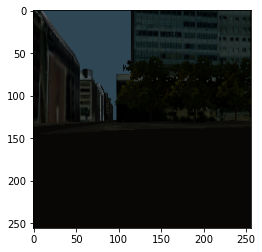

In [4]:
plt.imshow(img)

In [ ]:
navsim_util.image.cv2_util.isbright(img)

In [ ]:
# test for ten steps forward and ten steps back 

env_config["obs_mode"]=2
env = gym.make("navsim-v0", env_config=env_config)

print(env.reset()[-1])
#action_sample = env.action_space.sample()
print("Forward:")
for i in range(0,10):
    action_sample = [1,0,0]
    print(env.step(action_sample)[0][-1])
print("Backward:")
for i in range(0,10):
    action_sample = [-1,0,0]
    print(env.step(action_sample)[0][-1])
#action_sample = env.action_space.sample()
#action_sample = [-1,0,0]
#print(action_sample)
#s2 = env.step(action_sample)
env.close()
del env

In [ ]:
env_config["obs_mode"]=0
env = gym.make("navsim-v0", env_config=env_config)

pos0=env.reset()[-1][0:3]
pos1=env.step([1,0,0])[0][-1][0:3]
pos2=env.step([-1,0,0])[0][-1][0:3]
print(np.linalg.norm(pos1-pos0) - np.linalg.norm(pos2-pos1))

env.close()
del env

In [ ]:
env_config["obs_mode"]=0
env = gym.make("navsim-v0", env_config=env_config) 
navigable_map = env.get_navigable_map(resolution_x=512, resolution_y=256)
navigable_point = env.sample_navigable_point()
env.close()
del env

In [ ]:
print(navigable_point)

In [ ]:
plt.imshow(navigable_map,origin='lower',cmap='gray', vmin=0, vmax=1)
plt.plot(navigable_point[1],navigable_point[0],'bo')
plt.plot(navigable_point[0],navigable_point[1],'ro')

In [ ]:
# test for seeds for reset() and action samples

num_episodes=10
num_steps=10
num_actions = 3
seeds = [123,321]

reset_obs=np.full((2,2,num_episodes,16),0.0)
actions=np.full((2,2,num_episodes,num_steps,3),0.0)

for i in range(len(seeds)):
    env_config["seed"]=seeds[i]
    for j in range(2):
        env = gym.make("navsim-v0", env_config=env_config) 
        for e in range(num_episodes):
            reset_obs[i,j,e,:] = env.reset()[-1]
            for s in range(num_steps):
                #for k in range(0,num_actions)
                actions[i,j,e,s,:]=env.action_space.sample()
        env.close()
        del env
#    print(reset_obs)
#    print(actions)
#TODO: add the compare logic

In [ ]:
# test for fast_forward

num_episodes=20
env_config["seed"]=794

reset_obs=np.full((2,num_episodes,16),0.0)
env_config["debug"]=True


# no fast_forward 10
env_config["start_from_episode"]=1
env_config["log_folder"]="./env_log_1"
env = gym.make("navsim-v0", env_config=env_config) 
for e in range(num_episodes):
    reset_obs[0,e,:] = env.reset()[-1]
env.close()
del env

# no fast forward 5
env_config["start_from_episode"]=1
env_config["log_folder"]="./env_log_2"
env = gym.make("navsim-v0", env_config=env_config) 
for e in range(10):
    reset_obs[1,e,:] = env.reset()[-1]
env.close()
del env
# fast forward 5
env_config["start_from_episode"]=11
env_config["log_folder"]="./env_log_3"

env = gym.make("navsim-v0", env_config=env_config) 
for e in range(10,num_episodes):
    reset_obs[1,e,:] = env.reset()[-1]
env.close()
del env



#    print(reset_obs)
#    print(actions)
#TODO: add the compare logic

In [ ]:
print(reset_obs[0]-reset_obs[1])